<a href="https://colab.research.google.com/github/sk-monirul-islam-1/sentiment-analysis-of-Israel-Palestine-conflict/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.aljazeera.com/tag/israel-war-on-gaza/")
print(wd.page_source)  # results

In [ ]:
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [ ]:
for _ in range(10):
    button = wd.find_element(By.XPATH, "//[@class='show-more-button big-margin']")
    wd.execute_script("arguments[0].click();", button)

    time.sleep(5)


In [ ]:
containers = wd.find_elements(By.XPATH,"//div[@class='l-col l-col--8']")

In [ ]:
len(containers)

1

In [ ]:
zzz = containers[0]
zzz.get_attribute('innerHTML')

'<section id="news-feed-container" tabindex="-1" aria-label="Content Feed"><h2 class="screen-reader-text">Content Feed</h2><div class="sib-newsletter-form general-style" aria-label="Newsletter signup Widget"><div class="sib-form-container"><div class="sib-container--large sib-container--horizontal"><div class="sign-up-for-al-jazeera-container"><h3 class="sign-up-for-al-jazeera">Sign up for Al Jazeera</h3><h4 class="newsletter-title">Weekly Newsletter</h4></div><form id="sib-form-general" method="POST" data-type="subscription"><div class="sib-newsletter-form-fields-container"><span class="newsletter-description-line" aria-hidden="false"><span>The latest news from around the world.\r\nTimely. Accurate. Fair.</span></span><div class="sib-newsletter-form-fields" aria-hidden="false"><input class="sib-newsletter-form-input" type="email" id="email" name="email" autocomplete="email" placeholder="E-mail address" data-required="true" aria-label="E-mail address" tabindex="0" value=""><button clas

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
bsobj = BeautifulSoup(zzz.get_attribute('innerHTML'))
bsobj

<html><body><section aria-label="Content Feed" id="news-feed-container" tabindex="-1"><h2 class="screen-reader-text">Content Feed</h2><div aria-label="Newsletter signup Widget" class="sib-newsletter-form general-style"><div class="sib-form-container"><div class="sib-container--large sib-container--horizontal"><div class="sign-up-for-al-jazeera-container"><h3 class="sign-up-for-al-jazeera">Sign up for Al Jazeera</h3><h4 class="newsletter-title">Weekly Newsletter</h4></div><form data-type="subscription" id="sib-form-general" method="POST"><div class="sib-newsletter-form-fields-container"><span aria-hidden="false" class="newsletter-description-line"><span>The latest news from around the world.
Timely. Accurate. Fair.</span></span><div aria-hidden="false" class="sib-newsletter-form-fields"><input aria-label="E-mail address" autocomplete="email" class="sib-newsletter-form-input" data-required="true" id="email" name="email" placeholder="E-mail address" tabindex="0" type="email" value=""/><bu

In [ ]:
text_news = bsobj.find_all(name="div",attrs={"class":"gc__excerpt"})

In [ ]:
title_news = bsobj.find_all(name="h3",attrs={"class":"gc__title"})

In [ ]:
text_content_list = [div.get_text(separator='\n') for div in text_news]
for line in text_content_list:
    print(line)


Of­fi­cials from Qatar, Egypt, the US and Is­rael are edg­ing to­wards a deal with Hamas.
Un­bowed af­ter joint US-UK at­tacks on Yemen, the Iran-backed group warns of con­tin­ued at­tacks in Red Sea.
Is­rael con­firms flood­ing tun­nels with sea­wa­ter, the UN ral­lies to re­sume UN­R­WA fund­ing.
Houthi at­tacks on the Red Sea have forced ship­pers to avoid one of the world’s most cru­cial trade routes.
Pales­tine for­eign min­istry ac­cus­es Is­raeli forces of killing at least 30 ‘blind­fold­ed’ peo­ple as mass grave dis­cov­ered.
Po­lit­i­cal rhetoric heats up as Biden says he has de­cid­ed re­sponse to dead­ly drone at­tack blamed on Iran-aligned group.
A mass bur­ial was held in Rafah for dozens of Pales­tini­ans whose re­mains were re­turned to Gaza by Is­rael.
Hamas says the pro­pos­al in­volves three stages, in­clud­ing the re­lease of hostages in Gaza and Pales­tin­ian pris­on­ers.
Here’s what we know about the Is­raeli raid at a hos­pi­tal in the oc­cu­pied West Bank which k

In [ ]:
title_content_list = [div.get_text(separator='\n') for div in title_news]

In [ ]:
title_content_list = [div.get_text(separator='\n') for div in title_news]
text_content_list = [div.get_text(separator='\n') for div in text_news]

df = pd.DataFrame({
    'Title': title_content_list,
    'News': text_content_list,
})



In [ ]:
df['Source'] = 'aljazeera'
df.head()

Title  \
0  The Take – ‘Lost trust’: Gaza res­i­dents awai...   
1  Houthis threat­en more at­tacks against West­e...   
2  Is­rael’s war on Gaza: List of key events, day...   
3  How es­ca­lat­ing Red Sea cri­sis pos­es bil­l...   
4  Is­rael ac­cused of new Gaza mas­sacre af­ter ...   

                                                News     Source  
0  Of­fi­cials from Qatar, Egypt, the US and Is­r...  aljazeera  
1  Un­bowed af­ter joint US-UK at­tacks on Yemen,...  aljazeera  
2  Is­rael con­firms flood­ing tun­nels with sea­...  aljazeera  
3  Houthi at­tacks on the Red Sea have forced shi...  aljazeera  
4  Pales­tine for­eign min­istry ac­cus­es Is­rae...  aljazeera

## 2nd source

In [ ]:
wd.get("https://www.telegraph.co.uk/israel-hamas-war/")

In [ ]:
container2 = wd.find_elements(By.XPATH,"//main[@id='main-content']")

In [ ]:
len(container2)

1

In [ ]:
xxx = container2[0]
xxx.get_attribute('innerHTML')

'\n\n    \n\n    \n    \n\n\n\n\n\n\n\n\n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\n\t\n\n\t<section class="article-list article-list-hero" data-test="article-list-hero">\n\n\t\t\n\t\t\n\n\t\n\t\n\n\t\n\n\t\n\n\n\n\t\t\n\t\t<ul class="article-list__list grid">\n\n\t\t\t\n\t\t\t\n\n\t\t\t\t\n\t\t\t\t\n\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\n\t\n\t\t<li class="article-list__item\n\t\t\t\tgrid-col\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\tgrid-col-12\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\tgrid-row-3 grid-col-sm-6\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t">\n\n\t\t\t\n\t\t\t\n\n\t\t\t\n\t\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t\n\n\t\n\t\n\t\n\n\t\n\t\n\n\t\n\t\n\n\t\n\n\t\n\n\t\n\n\t\n\t\n\n\t\n\t\n\t\n\n\t\n\n\t\n\n\t\n\t\t<article data-test="card" data-track="" class="card\n\t\t \t\n\t\t\tu-clickable-area\n\t\t\tcard--feature\n\t\t\t\n\t\t\tcard--premium\n\t\t\t\n\t\t\t\n\t\t\t\n\

In [ ]:
bsobj2 = BeautifulSoup(xxx.get_attribute('innerHTML'))
bsobj2

<html><body><section class="article-list article-list-hero" data-test="article-list-hero">
<ul class="article-list__list grid">
<li class="article-list__item grid-col grid-col-12 grid-row-3 grid-col-sm-6">
<article class="card u-clickable-area card--feature card--premium card--hero" data-test="card" data-track="">
<div class="card__content" data-test="article-comment-content">
<h2 class="list-headline list-headline--premium u-heading-1" data-track-wrapper="article-list ">
<a class="list-headline__link u-clickable-area__link" data-test="list-headline-link" data-track-block="" href="/world-news/2024/01/31/israel-hamas-gaza-middle-east-war-latest-houthis-red-sea/" rel="">
<span class="u-heading-1 list-headline__text" data-test="headline">
<span class="">Israel-Hamas war: IDF 'strikes Syria' overnight</span>
</span>
</a>
</h2>
<div class="u-meta card__meta" data-test="card-meta">
<div class="card__meta-wrapper">
<span class="e-byline e-byline--premium" data-test="byline">
<span class="e-by

In [ ]:
paragraphs = bsobj2.find_all('p', class_='e-standfirst')

text_content_list2 = [p.get_text(strip=True) for p in paragraphs]
print(text_content_list2)


['France and Germany need to step up and prove they can be trusted as defence partners', 'Everything you need to know about travel to Egypt as the UK Government prepares to deploy aircraft carriers to the Red Sea', 'Move comes after country’s army chief warns that the risk of war on the northern border had become ‘much higher’', 'Israeli soldiers are losing limbs and sustaining life-changing facial injuries from ‘military-grade’ explosives used by Hamas in battle', 'The reserve unit fighter describes the three months of hell in Gaza – and why he finally left', 'National security spokesman pledges ‘very consequential response’ to drone attack but appears to rule out a direct assault on Iranian soil', 'Sanctions, imposed in coordination with USs, also target others believed to be part of international criminal gangs linked to Iran', "A London art installation gives a sense of what Israeli hostages would have been – and some continue to be – subjected to. It's harrowing", "There's nothing

In [ ]:
len(text_content_list2)

25

In [ ]:
title_news2 = bsobj2.find_all('span', class_='u-heading-6 list-headline__text')

title_content_list2 = [span.get_text(strip=True) if span else 'null' for span in title_news2]

# Fill in 'null' for missing elements
desired_list_size = len(text_content_list2)
title_content_list2 += ['null'] * (desired_list_size - len(title_content_list2))

print(title_content_list2)


['The EU is shamelessly free-riding off the British navy. It’s time it stepped up', 'Is it safe to travel to Egypt? Latest advice on the Red Sea resorts', 'The Briton who joined the IDF: ‘My family died in the Holocaust – I had to defend Jewish people’', 'White House drawing up plans for revenge strike on Iranian militia', 'UK sanctions Iranian officials over plot to kill journalists on British soil', 'Israel-Hamas war: US failed to stop drone after mistaking it for its own', 'Israel can’t afford the world to forget Hamas’s horrific crimes', 'When it comes to Hamas terrorism, there’s no ‘justice’ for Israel', 'Deadly attack may leave US no option but to take the fight directly to Iran', 'Israeli cabinet ministers call for post-war settlements in Gaza', 'UN workers in Gaza kidnapped Israeli woman and gave weapons to Hamas', 'How the US could hit back against Iran', 'Donald Trump: We are on the brink of World War Three', "Israel-Hamas war live: Biden 'weighing pausing weapons deliveries'

In [ ]:
df2 = pd.DataFrame({
    'Title': title_content_list2,
    'News': text_content_list2,
    })

In [ ]:
df2['Source'] = 'telegraph'
df2.head()

Title  \
0  The EU is shamelessly free-riding off the Brit...   
1  Is it safe to travel to Egypt? Latest advice o...   
2  The Briton who joined the IDF: ‘My family died...   
3  White House drawing up plans for revenge strik...   
4  UK sanctions Iranian officials over plot to ki...   

                                                News     Source  
0  France and Germany need to step up and prove t...  telegraph  
1  Everything you need to know about travel to Eg...  telegraph  
2  Move comes after country’s army chief warns th...  telegraph  
3  Israeli soldiers are losing limbs and sustaini...  telegraph  
4  The reserve unit fighter describes the three m...  telegraph

In [ ]:
df = pd.concat([df, df2], ignore_index=True)

## 3rd source

In [ ]:
wd.get("https://www.businessinsider.in/searchresult.cms?query=israel+and+hamas&sortorder=score&curpg=3")

In [ ]:
container3 = wd.find_elements(By.XPATH,"//div[@class='container-fluid']")

In [ ]:
yyy = container3[0]
yyy.get_attribute('innerHTML')

'<section class="list-container"><section class="listing-parent-row"><div id="append_morestories" class="list_bottom_stories"><section class="module search-controls"><header><h1>You searched for "israel and hamas" and got 304 results</h1></header><div class="controls"><div class="inner"><span class="label">Sort by:</span><ul data-behavior="checkbox_toggles"><li data-group="filter"><a class="active" href="/searchresult.cms?query=israel and hamas&amp;sortorder=score&amp;curpg=1"><i class="faux-checkbox"></i> Most relevant</a></li><li data-group="filter" class=""><a class="" href="/searchresult.cms?query=israel and hamas&amp;sortorder=effectivedate&amp;curpg=1"><i class="faux-checkbox"></i> Most recent</a></li></ul></div></div></section><!--/searchqry.cms?type=score&query=israel and hamas&curpg=3potime:227--><div class="leaderboard-scrollable-cont mob-only search-only"><span class="leaderboard-ads-text">Advertisement</span><div style="width: 100%;" class="leaderboard-scrollable-root"><div

In [ ]:
bsobj3 = BeautifulSoup(yyy.get_attribute('innerHTML'))
bsobj3

<html><body><section class="list-container"><section class="listing-parent-row"><div class="list_bottom_stories" id="append_morestories"><section class="module search-controls"><header><h1>You searched for "israel and hamas" and got 304 results</h1></header><div class="controls"><div class="inner"><span class="label">Sort by:</span><ul data-behavior="checkbox_toggles"><li data-group="filter"><a class="active" href="/searchresult.cms?query=israel and hamas&amp;sortorder=score&amp;curpg=1"><i class="faux-checkbox"></i> Most relevant</a></li><li class="" data-group="filter"><a class="" href="/searchresult.cms?query=israel and hamas&amp;sortorder=effectivedate&amp;curpg=1"><i class="faux-checkbox"></i> Most recent</a></li></ul></div></div></section><!--/searchqry.cms?type=score&query=israel and hamas&curpg=3potime:227--><div class="leaderboard-scrollable-cont mob-only search-only"><span class="leaderboard-ads-text">Advertisement</span><div class="leaderboard-scrollable-root" style="width: 

In [ ]:
text_news3 = bsobj3.find_all(name="div",attrs={"list-bottom-text"})


In [ ]:
title_news3 = bsobj3.find_all(name="a",attrs={"class":"list-title-link"})

In [ ]:
text_content_list3 = [div.get_text(separator='\n') for div in text_news3]

In [ ]:
title_content_list3 = [div.get_text(separator='\n') for div in title_news3]


In [ ]:
title_content_list3 = [div.get_text(separator='\n') for div in title_news3]
text_content_list3 = [div.get_text(separator='\n') for div in text_news3]

df3 = pd.DataFrame({
    'Title': title_content_list,
    'News': text_content_list,
})


In [ ]:
df3['Source'] = 'business_insider'
df3.head()

Title  \
0  The Take – ‘Lost trust’: Gaza res­i­dents awai...   
1  Houthis threat­en more at­tacks against West­e...   
2  Is­rael’s war on Gaza: List of key events, day...   
3  How es­ca­lat­ing Red Sea cri­sis pos­es bil­l...   
4  Is­rael ac­cused of new Gaza mas­sacre af­ter ...   

                                                News            Source  
0  Of­fi­cials from Qatar, Egypt, the US and Is­r...  business_insider  
1  Un­bowed af­ter joint US-UK at­tacks on Yemen,...  business_insider  
2  Is­rael con­firms flood­ing tun­nels with sea­...  business_insider  
3  Houthi at­tacks on the Red Sea have forced shi...  business_insider  
4  Pales­tine for­eign min­istry ac­cus­es Is­rae...  business_insider

In [ ]:
df = pd.concat([df, df3], ignore_index=True)

## 4th source

In [ ]:
wd.get("https://indianexpress.com/article/world/israel-hamas-war-news-live-updates-gaza-palestine-netanyahu-9015172/")

In [ ]:
container4 = wd.find_elements(By.XPATH,"//div[@id='section']")

In [ ]:
len(container4)

1

In [ ]:
aaa = container4[0]
aaa.get_attribute('innerHTML')

'\n\t\t<div class="container">\n\t\t\t\t\t\t<div class="row">\n\t\t\t\t<div class="heading-part">\n\t\t\t\t\t\t<nav aria-label="Breadcrumb" class="ie-breadcrumb">\n\t\t<ol class="m-breadcrumb">\n\t\t\t<li><a rel="noamphtml" href="https://indianexpress.com/">News</a></li><li><a rel="noamphtml" href="https://indianexpress.com/section/world/">World</a></li><li><span>Israel-Hamas War Highlights: 130 Hamas tunnel shafts destroyed in Gaza, claims IDF; Al Quds hospital nearing shutdown amid severe fuel shortage</span></li>\t\t</ol>\n\t</nav>\n\t\t\t\t\t\t\t\t\t\t\t<h1 itemprop="headline">Israel-Hamas War Highlights: 130 Hamas tunnel shafts destroyed in Gaza, claims IDF; Al Quds hospital nearing shutdown amid severe fuel shortage</h1>\n\t\t\t\t\t\t\t\t\t\t\t<h2 itemprop="description" class="synopsis">Israel-Hamas War News Highlights: &nbsp;More than 10,300 Palestinians, including 4,200 children have been killed in the war so far, said the Gaza health ministry.</h2>\n\t\t\t\t\t\t\t\t\t\t\t<div 

In [ ]:
bsobj4 = BeautifulSoup(aaa.get_attribute('innerHTML'))
bsobj4

<html><body><div class="container">
<div class="row">
<div class="heading-part">
<nav aria-label="Breadcrumb" class="ie-breadcrumb">
<ol class="m-breadcrumb">
<li><a href="https://indianexpress.com/" rel="noamphtml">News</a></li><li><a href="https://indianexpress.com/section/world/" rel="noamphtml">World</a></li><li><span>Israel-Hamas War Highlights: 130 Hamas tunnel shafts destroyed in Gaza, claims IDF; Al Quds hospital nearing shutdown amid severe fuel shortage</span></li> </ol>
</nav>
<h1 itemprop="headline">Israel-Hamas War Highlights: 130 Hamas tunnel shafts destroyed in Gaza, claims IDF; Al Quds hospital nearing shutdown amid severe fuel shortage</h1>
<h2 class="synopsis" itemprop="description">Israel-Hamas War News Highlights:  More than 10,300 Palestinians, including 4,200 children have been killed in the war so far, said the Gaza health ministry.</h2>
<div class="ie-authorbox">
<div class="editorbx fleft editor-details-new-change">
							 Written by 					<a class="bulletProj"

In [ ]:
text_container4 = wd.find_elements(By.XPATH,"//div[@class='body-lvblg']")

In [ ]:
len(text_container4)

60

In [ ]:
text_news4 = []

# Iterate through the list of elements
for text_container in text_container4:
    # Get the innerHTML for each element
    inner_html = text_container.get_attribute('innerHTML')

    # Use BeautifulSoup to parse the HTML content
    soup = BeautifulSoup(inner_html, 'html.parser')

    # Extract the text from the parsed HTML
    extracted_text = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])

    # Append the extracted text to the list
    text_news4.append(extracted_text)



In [ ]:
title_news4 = bsobj4.find_all(name="div",attrs={"class":"heading-lvblg"})
title_news4

[<div class="heading-lvblg">Italy sending a hospital ship to be stationed off Gaza coast</div>,
 <div class="heading-lvblg">IDF claims to have destroyed 130 Hamas tunnel shafts in Gaza</div>,
 <div class="heading-lvblg">IDF claims to have destroyed 130 Hamas tunnel shafts in Gaza</div>,
 <div class="heading-lvblg">Gaza's Al Quds hospital shuts down main generator, surgical ward amid severe fuel shortage</div>,
 <div class="heading-lvblg">43 Ukrainian citizens evacuated from Gaza, Zelenskyy says</div>,
 <div class="heading-lvblg">39 journalists died since October 7</div>,
 <div class="heading-lvblg">Israeli Defence Forces open evacuation corridor for 5 hours</div>,
 <div class="heading-lvblg">Watch | 'I'm fine, we're running': Sisters of man taken hostage from music festival on Oct 7 recall his last message</div>,
 <div class="heading-lvblg">G7 calls for 'humanitarian pauses' in Gaza</div>,
 <div class="heading-lvblg">Why is Al-Shifa hospital at the heart of Israeli attacks?</div>,
 <di

In [ ]:
title_content_list4 = [div.get_text(separator='\n') for div in title_news4]

# Check if text_news4 is a string or a list of elements
if isinstance(text_news4, list):
    # If it's a list, assume it's already a list of strings
    text_content_list4 = text_news4
else:
    # If it's a string, parse it with BeautifulSoup to extract text
    soup = BeautifulSoup(text_news4, 'html.parser')
    text_content_list4 = [p.get_text(separator='\n') for p in soup.find_all('p')]

df4 = pd.DataFrame({
    'Title': title_content_list4,
    'News': text_content_list4,
})



In [ ]:
df4['Source'] = 'the_indian_express'
df4.head()

Title  \
0  Italy sending a hospital ship to be stationed ...   
1  IDF claims to have destroyed 130 Hamas tunnel ...   
2  IDF claims to have destroyed 130 Hamas tunnel ...   
3  Gaza's Al Quds hospital shuts down main genera...   
4  43 Ukrainian citizens evacuated from Gaza, Zel...   

                                                News              Source  
0  Italy is sending a hospital ship that will be ...  the_indian_express  
1  The Israel Defense Forces said troops found an...  the_indian_express  
2  The Israel Defense Forces said troops found an...  the_indian_express  
3  Palestine Red Cross Society-run Al Quds Hospit...  the_indian_express  
4  Forty-three Ukrainian citizens have been evacu...  the_indian_express

In [ ]:
df = pd.concat([df, df4], ignore_index=True)

## 5th source

In [ ]:
wd.get("https://news.un.org/en/tags/israel-palestine")

In [ ]:
for _ in range(5):
    button = wd.find_element(By.XPATH, "//a[@class='page-link']")
    wd.execute_script("arguments[0].click();", button)

    time.sleep(5)

In [ ]:
container5 = wd.find_elements(By.XPATH,"//div[@id='main-container']")

In [ ]:
bbb = container5[0]
bbb.get_attribute('innerHTML')

'\n          \n          <div class="row row-offcanvas row-offcanvas-left clearfix">\n                                                <main class="main-content col-lg-9" id="content" role="main">\n                \n              <section class="section">\n                <a id="main-content" tabindex="-1"></a>\n                                    <div class="facet-inactive block-facets-ajax js-facet-block-id-facet_listing_pages_taxonomy_term_contains_audio block-facet--checkbox block block-facets block-facet-block-facet-listing-pages-taxonomy-term-contains-audio block-facet-listing-pages-taxonomy-term-contains-audio" id="block-facet-listing-pages-taxonomy-term-contains-audio">\n  \n      <h2 class="block-title block__title">\n      Filter by:\n    </h2>\n    \n      <div class="content block__content">\n      <div class="facets-widget-checkbox">\n      <ul data-drupal-facet-id="facet_listing_pages_taxonomy_term_contains_audio" data-drupal-facet-alias="audio" class="facet-inactive js-fa

In [ ]:
bsobj5 = BeautifulSoup(bbb.get_attribute('innerHTML'))
bsobj5

<html><body><div class="row row-offcanvas row-offcanvas-left clearfix">
<main class="main-content col-lg-9" id="content" role="main">
<section class="section">
<a id="main-content" tabindex="-1"></a>
<div class="facet-inactive block-facets-ajax js-facet-block-id-facet_listing_pages_taxonomy_term_contains_audio block-facet--checkbox block block-facets block-facet-block-facet-listing-pages-taxonomy-term-contains-audio block-facet-listing-pages-taxonomy-term-contains-audio" id="block-facet-listing-pages-taxonomy-term-contains-audio">
<h2 class="block-title block__title">
      Filter by:
    </h2>
<div class="content block__content">
<div class="facets-widget-checkbox">
<ul class="facet-inactive js-facets-checkbox-links item-list__checkbox js-facets-widget" data-drupal-facet-alias="audio" data-drupal-facet-id="facet_listing_pages_taxonomy_term_contains_audio" data-once="facets-checkbox-transform js-facet-filter"><li class="facet-item"><input class="facets-checkbox" id="audio-1" type="chec

In [ ]:
title_news5 = bsobj5.find_all(name="span",attrs={"class":"field field--name-title field--type-string field--label-hidden"})
title_news5

[<span class="field field--name-title field--type-string field--label-hidden">World News in Brief, Bangladesh democracy call, accountability for Israeli victims of sexual violence, plastic pollution in the Antarctic, powering Ukraine</span>,
 <span class="field field--name-title field--type-string field--label-hidden">News in Brief 5 January 2024</span>,
 <span class="field field--name-title field--type-string field--label-hidden">‘Everyone was asking about a ceasefire’: Malta’s UN ambassador reports back on visit to Gaza border</span>,
 <span class="field field--name-title field--type-string field--label-hidden">Gaza: ‘Somehow their nightmare has just got that much worse’</span>,
 <span class="field field--name-title field--type-string field--label-hidden">In Gaza, ‘things are getting worse’: Palestine refugees agency</span>,
 <span class="field field--name-title field--type-string field--label-hidden">Gaza-Israel crisis: Hospitals should not be a war zone, says UN’s emergency relief 

In [ ]:
text_news5 = bsobj5.find_all(name="div",attrs={"class":"clearfix text-formatted field field--name-body field--type-text-with-summary field--label-hidden field__item"})


In [ ]:
title_content_list5 = [div.get_text(separator='\n') for div in title_news5]
text_content_list5 = [div.get_text(separator='\n') for div in text_news5]

df5 = pd.DataFrame({
    'Title': title_content_list,
    'News': text_content_list,
})


In [ ]:
df5['Source'] = 'un'
df5.head()

Title  \
0  The Take – ‘Lost trust’: Gaza res­i­dents awai...   
1  Houthis threat­en more at­tacks against West­e...   
2  Is­rael’s war on Gaza: List of key events, day...   
3  How es­ca­lat­ing Red Sea cri­sis pos­es bil­l...   
4  Is­rael ac­cused of new Gaza mas­sacre af­ter ...   

                                                News Source  
0  Of­fi­cials from Qatar, Egypt, the US and Is­r...     un  
1  Un­bowed af­ter joint US-UK at­tacks on Yemen,...     un  
2  Is­rael con­firms flood­ing tun­nels with sea­...     un  
3  Houthi at­tacks on the Red Sea have forced shi...     un  
4  Pales­tine for­eign min­istry ac­cus­es Is­rae...     un

In [ ]:
df = pd.concat([df, df5], ignore_index=True)


In [ ]:
df



Title  \
0    The Take – ‘Lost trust’: Gaza res­i­dents awai...   
1    Houthis threat­en more at­tacks against West­e...   
2    Is­rael’s war on Gaza: List of key events, day...   
3    How es­ca­lat­ing Red Sea cri­sis pos­es bil­l...   
4    Is­rael ac­cused of new Gaza mas­sacre af­ter ...   
..                                                 ...   
410  At least 9 killed in Is­raeli at­tack on UN sh...   
411  Hu­man­i­tar­i­an aid for Gaza blocked by prot...   
412  Peo­ple run for their lives from Khan You­nis ...   
413  How Is­rael has de­stroyed Gaza’s schools and ...   
414  UN, UK push Is­rael on role of two-state so­lu...   

                                                  News     Source  
0    Of­fi­cials from Qatar, Egypt, the US and Is­r...  aljazeera  
1    Un­bowed af­ter joint US-UK at­tacks on Yemen,...  aljazeera  
2    Is­rael con­firms flood­ing tun­nels with sea­...  aljazeera  
3    Houthi at­tacks on the Red Sea have forced shi...  aljazeera  
4    Pales­tine for­eign min­istry ac­cus­es Is­rae...  aljazeera  
..                                                 ...        ...  
410  UN­R­WA of­fi­cial fears ‘mass ca­su­al­ties’ ...         un  
411  A crowd of Is­raelis gath­ered to stop aid tru...         un  
412  Pales­tini­ans are flee­ing Khan You­nis in so...         un  
413  All schools in Gaza have been shut and no uni­...         un  
414  PM Ne­tanyahu’s re­jec­tion of Pales­tin­ian s...         un  

[415 rows x 3 columns]

In [ ]:
df.describe()

Title  \
count                                                 415   
unique                                                191   
top     The Take – ‘Lost trust’: Gaza res­i­dents awai...   
freq                                                    3   

                                                     News     Source  
count                                                 415        415  
unique                                                194          5  
top     Of­fi­cials from Qatar, Egypt, the US and Is­r...  aljazeera  
freq                                                    3        110

In [ ]:
df.isnull().sum()

Title     0
News      0
Source    0
dtype: int64

In [ ]:
import re

In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return text  # Return as is if text is NaN or None
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# apply the cleaning function to both the Title and News columns
df['Title_cleaned'] = df['Title'].apply(clean_text)
df['News_cleaned'] = df['News'].apply(clean_text)

df[['Title', 'Title_cleaned', 'News', 'News_cleaned']].head()


Title  \
0  The Take – ‘Lost trust’: Gaza res­i­dents awai...   
1  Houthis threat­en more at­tacks against West­e...   
2  Is­rael’s war on Gaza: List of key events, day...   
3  How es­ca­lat­ing Red Sea cri­sis pos­es bil­l...   
4  Is­rael ac­cused of new Gaza mas­sacre af­ter ...   

                                       Title_cleaned  \
0  the take  lost trust gaza residents await ceas...   
1  houthis threaten more attacks against western ...   
2        israels war on gaza list of key events day    
3  how escalating red sea crisis poses billions o...   
4  israel accused of new gaza massacre after  bod...   

                                                News  \
0  Of­fi­cials from Qatar, Egypt, the US and Is­r...   
1  Un­bowed af­ter joint US-UK at­tacks on Yemen,...   
2  Is­rael con­firms flood­ing tun­nels with sea­...   
3  Houthi at­tacks on the Red Sea have forced shi...   
4  Pales­tine for­eign min­istry ac­cus­es Is­rae...   

                                        News_cleaned  
0  officials from qatar egypt the us and israel a...  
1  unbowed after joint usuk attacks on yemen the ...  
2  israel confirms flooding tunnels with seawater...  
3  houthi attacks on the red sea have forced ship...  
4  palestine foreign ministry accuses israeli for...

In [ ]:

articles_per_source = df['Source'].value_counts()



df['Article_Length'] = df['News_cleaned'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)


article_length_stats = df['Article_Length'].describe()

articles_per_source, article_length_stats


(aljazeera             110
 business_insider      110
 un                    110
 the_indian_express     60
 telegraph              25
 Name: Source, dtype: int64,
 count    415.000000
 mean      31.407229
 std       37.684047
 min        0.000000
 25%       17.000000
 50%       18.000000
 75%       20.000000
 max      232.000000
 Name: Article_Length, dtype: float64)

In [ ]:
from textblob import TextBlob

In [ ]:


# Function to classify sentiment based on polarity score
def classify_sentiment(text):
    # Getting sentiment scores
    sentiment = TextBlob(text).sentiment
    polarity = sentiment.polarity

    # Classifying sentiment
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Applying sentiment analysis on the cleaned news articles
df['Sentiment'] = df['News_cleaned'].apply(classify_sentiment)

# Displaying the distribution of sentiments across the articles
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution


Neutral     215
Positive    110
Negative     90
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np



# Creating the Document-Term Matrix (DTM)
# Define the CountVectorizer, excluding common English stopwords
cv = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Apply CountVectorizer to cleaned news articles
dtm = cv.fit_transform(df['News_cleaned'].dropna())  # Drop NA values to ensure clean input




In [ ]:
# Define and fit LDA model
lda = LatentDirichletAllocation(n_components=5,  # Assuming we are looking for 5 topics
                                max_iter=10,
                                learning_method='online',
                                random_state=0)

lda.fit(dtm)



LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=0)

In [ ]:
# Function to display topics and the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Displaying the topics
no_top_words = 10
display_topics(lda, cv.get_feature_names_out(), no_top_words)

Topic 0:
gaza palestinians says israel war israels thousands safe central military
Topic 1:
gaza israeli israel hamas war strip khan younis south forces
Topic 2:
gaza israeli said israel palestinian israels war people palestinians hospital
Topic 3:
people israeli tells killed hundreds jazeera near drone unrwa wounded
Topic 4:
israel gaza court genocide prevent acts says measures order icj


In [ ]:
# Group by 'Source' and 'Sentiment' to get the count of each sentiment type for each news agency
sentiment_distribution = df.groupby(['Source', 'Sentiment']).size().unstack().fillna(0)

# Normalize the counts to get proportions for better comparison
sentiment_distribution_normalized = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

print(sentiment_distribution_normalized)


Sentiment           Negative   Neutral  Positive
Source                                          
aljazeera               0.20  0.600000  0.200000
business_insider        0.20  0.600000  0.200000
telegraph               0.24  0.520000  0.240000
the_indian_express      0.30  0.066667  0.633333
un                      0.20  0.600000  0.200000


In [ ]:
# Transform the document-term matrix to get the topic distribution for each document
topic_distribution = lda.transform(dtm)

# Assign the most prevalent topic to each article
df['Dominant_Topic'] = topic_distribution.argmax(axis=1)

# Analyzing topic frequency by each agency
topic_frequency_by_agency = df.groupby('Source')['Dominant_Topic'].value_counts(normalize=True).unstack().fillna(0)

topic_frequency_by_agency


Dominant_Topic             0         1         2         3         4
Source                                                              
aljazeera           0.127273  0.245455  0.290909  0.063636  0.272727
business_insider    0.127273  0.245455  0.290909  0.063636  0.272727
telegraph           0.000000  0.360000  0.360000  0.080000  0.200000
the_indian_express  0.033333  0.350000  0.500000  0.066667  0.050000
un                  0.127273  0.245455  0.290909  0.063636  0.272727

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Step 2: Apply SVD for LSA
# We choose n_components as 5 for consistency with the LDA model, but this can be adjusted
lsa = TruncatedSVD(n_components=5, random_state=0)
lsa.fit(dtm)

# Function to display topics for LSA, similar to what we did for LDA
def display_topics_lsa(model, feature_names, no_top_words):
    for topic_idx, component in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in component.argsort()[:-no_top_words - 1:-1]]))

# Displaying the topics generated by LSA
display_topics_lsa(lsa, cv.get_feature_names_out(), no_top_words=10)


Topic 0:
gaza israeli said israel hamas war forces people strip ground
Topic 1:
israeli said hospital military bank west forces instagram violence occupied
Topic 2:
said war minister israelhamas conflict monday humanitarian tuesday woman crossing
Topic 3:
israel hamas ground said forces operation troops says destroyed began
Topic 4:
gaza strip ground said crossing forces hamas egypt destroyed rafah


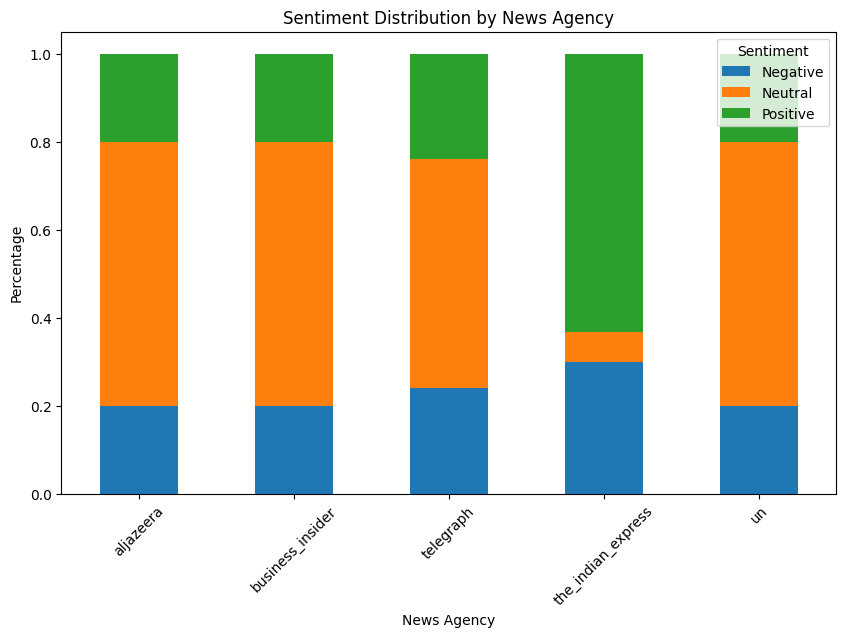

In [ ]:
import matplotlib.pyplot as plt

# Sentiment distribution by agency for visualization
sentiment_distribution_by_agency_vis = df.groupby('Source')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
sentiment_distribution_by_agency_vis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by News Agency')
plt.ylabel('Percentage')
plt.xlabel('News Agency')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


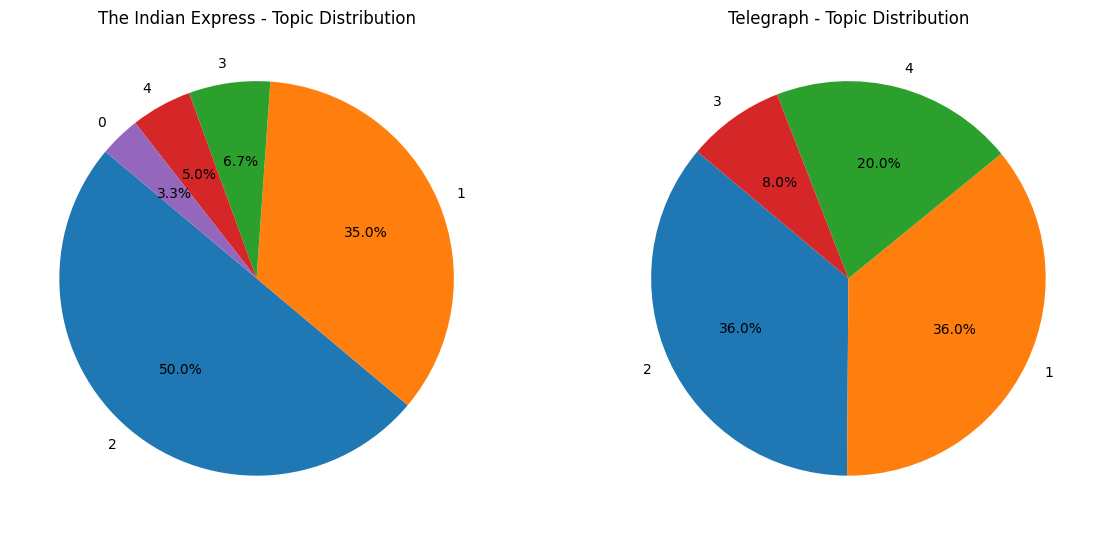

In [ ]:
# Pie chart for the distribution of dominant topics within "The Indian Express" and "Telegraph"
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Data for "The Indian Express"
topic_distribution_indian_express = df[df['Source'] == 'the_indian_express']['Dominant_Topic'].value_counts(normalize=True)
ax[0].pie(topic_distribution_indian_express, labels=topic_distribution_indian_express.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('The Indian Express - Topic Distribution')

# Data for "Telegraph"
topic_distribution_telegraph = df[df['Source'] == 'telegraph']['Dominant_Topic'].value_counts(normalize=True)
ax[1].pie(topic_distribution_telegraph, labels=topic_distribution_telegraph.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Telegraph - Topic Distribution')



plt.show()


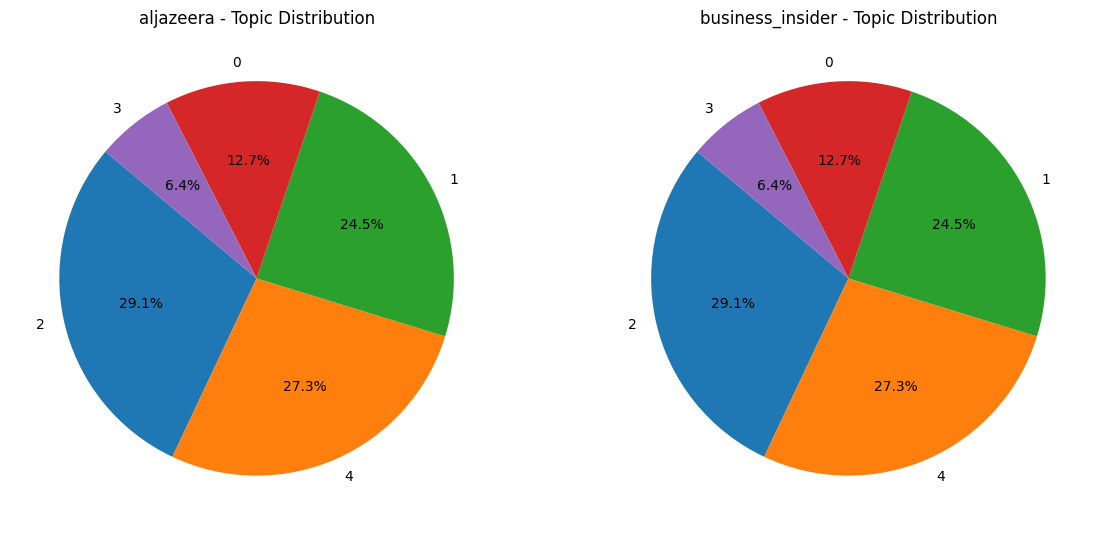

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

topic_distribution_telegraph = df[df['Source'] == 'aljazeera']['Dominant_Topic'].value_counts(normalize=True)
ax[0].pie(topic_distribution_telegraph, labels=topic_distribution_telegraph.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('aljazeera - Topic Distribution')


topic_distribution_telegraph = df[df['Source'] == 'business_insider']['Dominant_Topic'].value_counts(normalize=True)
ax[1].pie(topic_distribution_telegraph, labels=topic_distribution_telegraph.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('business_insider - Topic Distribution')

plt.show()


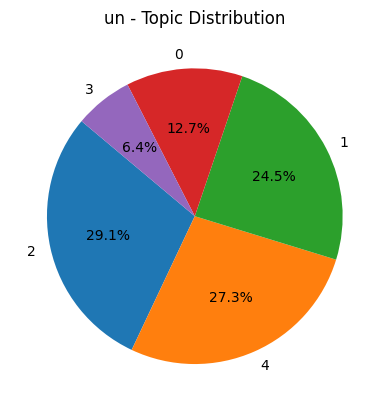

In [ ]:
fig, ax = plt.subplots()
topic_distribution_telegraph = df[df['Source'] == 'un']['Dominant_Topic'].value_counts(normalize=True)
ax.pie(topic_distribution_telegraph, labels=topic_distribution_telegraph.index, autopct='%1.1f%%', startangle=140)
ax.set_title('un - Topic Distribution')
plt.show()

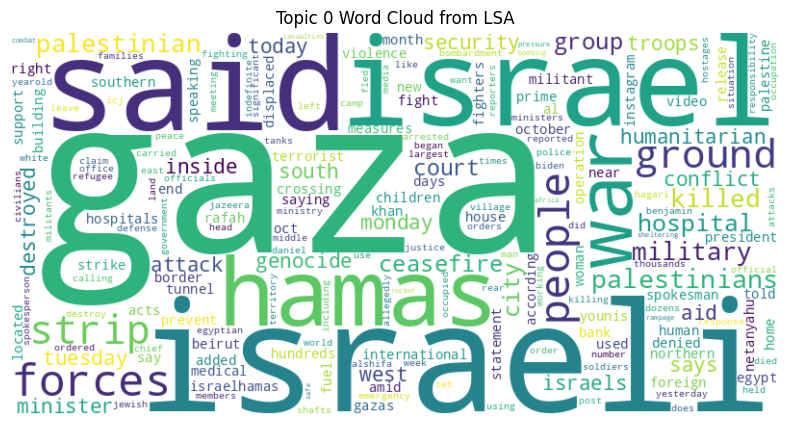

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for Topic 0 from LSA
topic_words = dict(zip(cv.get_feature_names_out(), lsa.components_[0]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 0 Word Cloud from LSA')
plt.show()


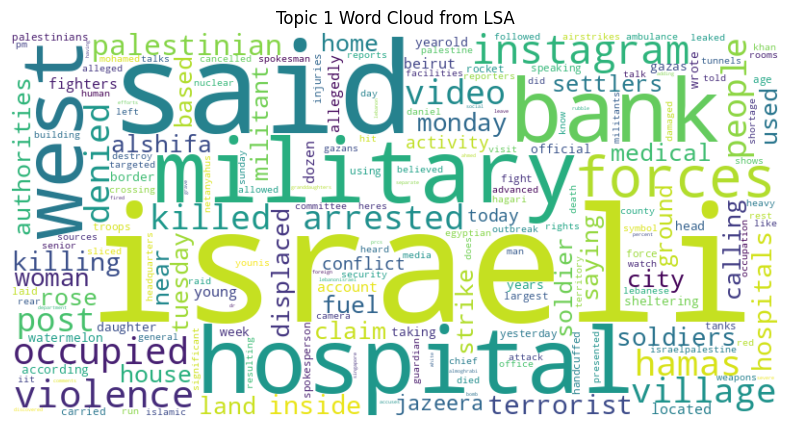

In [ ]:
topic_words = dict(zip(cv.get_feature_names_out(), lsa.components_[1]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 1 Word Cloud from LSA')
plt.show()

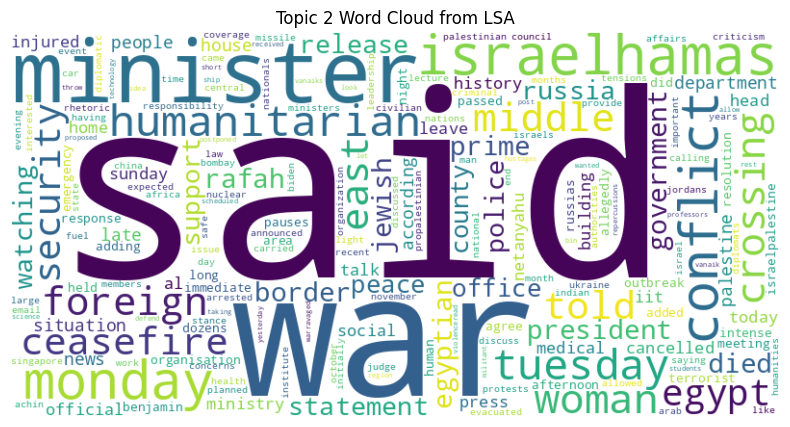

In [ ]:
topic_words = dict(zip(cv.get_feature_names_out(), lsa.components_[2]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 2 Word Cloud from LSA')
plt.show()

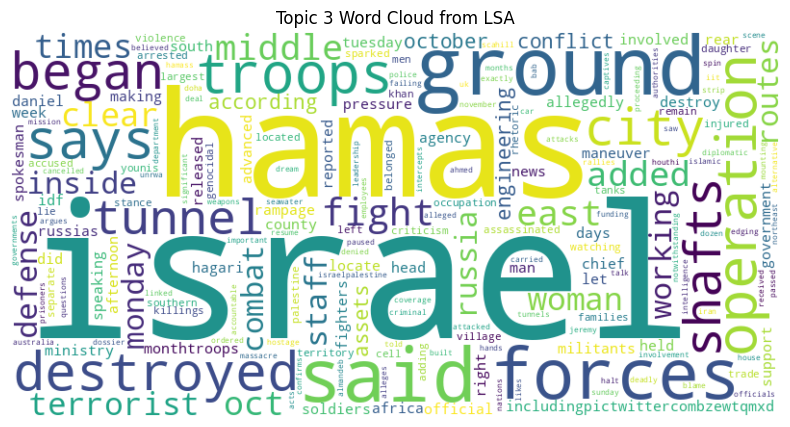

In [ ]:
topic_words = dict(zip(cv.get_feature_names_out(), lsa.components_[3]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 3 Word Cloud from LSA')
plt.show()

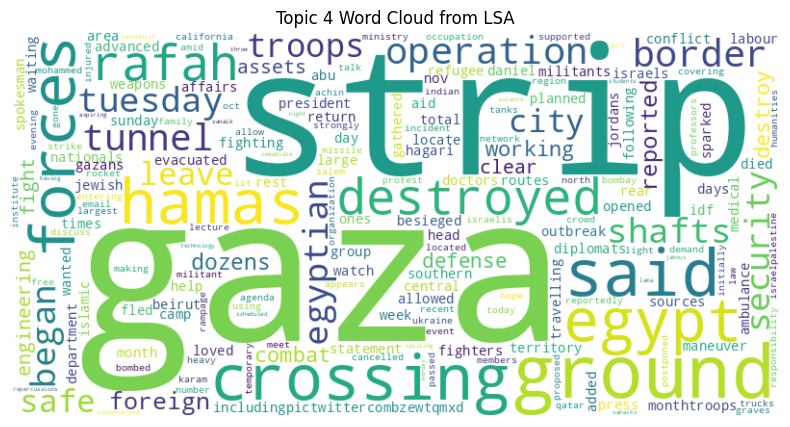

In [ ]:
topic_words = dict(zip(cv.get_feature_names_out(), lsa.components_[4]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic 4 Word Cloud from LSA')
plt.show()